In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import pyne
import sap
pyne.__version__, sap.__version__

('0.5.1', '2017-04-21')

In [3]:
data = pyne.EVTData('../data_np/run289', '../data/run289-13328.evt')
data.load_data()

reading from ../data_np/run289...


(<matplotlib.figure.Figure at 0x7faed923f438>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faed1c4e278>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7faed21995f8>]], dtype=object))

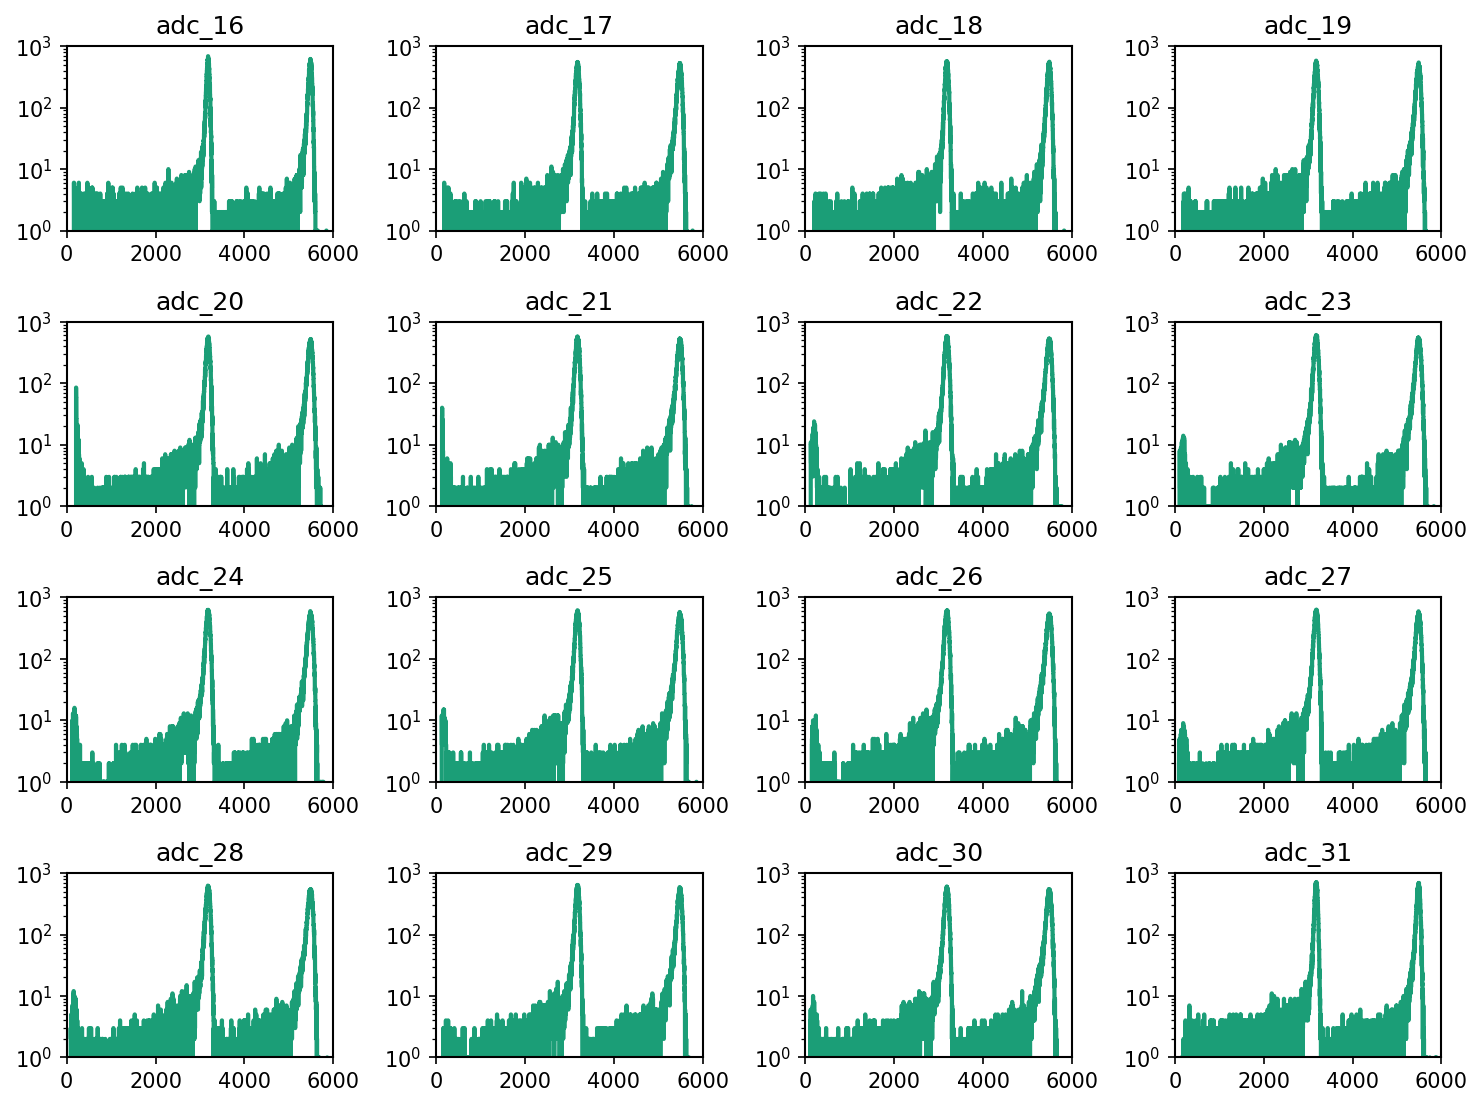

In [6]:
d = sap.Display(data)
d.display_array(xlim=(0, 6000))

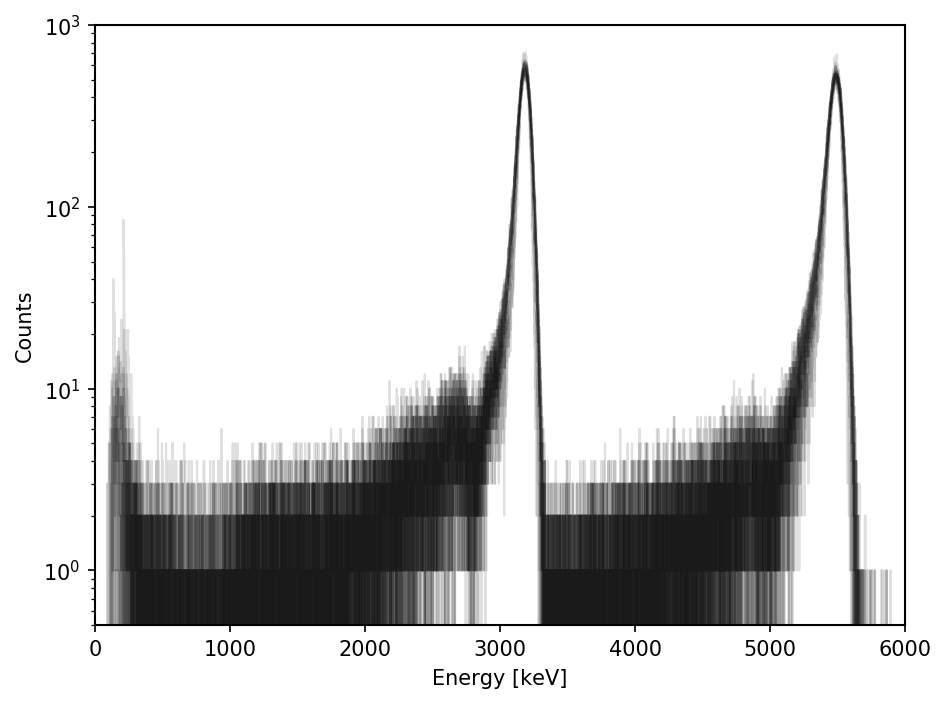

In [10]:
fig = plt.figure(figsize=(5 * 1.35, 5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for adc in data.adc[16:]:
    ax.semilogy(adc.energies, adc.counts, 'k', nonposy='clip', linestyle='steps', lw=1, alpha=1/8)
    ax.set_ylim((0.5, 1000))
    ax.set_xlim((0, 6000))
    ax.set_xlabel('Energy [keV]')
    ax.set_ylabel('Counts')
fig.savefig('../images/calibration_overlay.png')
plt.show()

In [ ]:
from scipy.signal import find_peaks_cwt

test_adc = run289.adc[16]
peaks = find_peaks_cwt(test_adc.counts, np.arange(5, 50, 1))
peaks = np.array(peaks)
max_peaks = np.where(test_adc.counts[peaks] > 50)
print(max_peaks,
      test_adc.counts[peaks][max_peaks],
      test_adc.energies[peaks][max_peaks],
      sep='\n')

# for p, e, c in zip(peaks, test_adc.energies[peaks], test_adc.counts[peaks]):
#     print('{:5d} {:9.2f} {:5d}'.format(p, e, c))

In [ ]:
from scipy.optimize import curve_fit

energies = test_adc.energies[peaks][max_peaks]
par_0, _ = curve_fit(sap.gaussian, test_adc.energies, test_adc.counts, p0=[100, energies[0], 10])
par_1, _ = curve_fit(sap.gaussian, test_adc.energies, test_adc.counts, p0=[100, energies[1], 10])
par_0, par_1

In [ ]:
pars = np.vstack((par_0, par_1))
A, mu, sig = pars.T
sig * 2 * np.sqrt(2 * np.log(2))

Post-Manoel 2017-04-11
-------------------------

Look at $\Delta E / E_0$ for calibration peaks, check $K$ for magnet from Gwen, see if calibration terms for the 16 channels are roughly the same.

In [ ]:
delta_E = sig * 2 * np.sqrt(2 * np.log(2))
delta_E / mu * 100  # percent energy spread for two calibration peaks

In [ ]:
2.770 + 2.770 * 0.02156

In [ ]:
fw10m = sig * 2 * np.sqrt(2 * np.log(10))
fw10m

In [ ]:
2776 + 125.0669

In [ ]:
max_adc = run270.adc[23]
max_loc = np.argmax(max_adc.counts)
max_loc, max_adc.energies[max_loc]

In [ ]:
a.single_plot(max_adc, energy_range=[2776.1, 2814.0], xlim=(2625, 3125),
              ylim=(0.1, 1000), figsize=(5.4, 4))
max_adc.counts.sum()

New $K$ value resulted in a shift of 10 keV upward for proton beam, 6 keV upward for produced alphas at the target front. Peaks seen in detector for alphas still go to high energy, but high energy edge roughly consistent with expected value from spread in peaks from the calibration source.